# Bank Marketing Campaign Analysis
This notebook provides an analysis of a bank marketing campaign dataset.

## 1. Loading the Dataset

In [5]:

import pandas as pd

# Load the dataset from the Excel file path
file_path = r'C:\Users\Annuj\Downloads\archive (6)\bank.csv'
data = pd.read_csv (file_path)

# Display the first few rows to verify data load
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 2. Exploratory Data Analysis (EDA)
### 2.1. Distribution of Age and Term Deposit Subscription

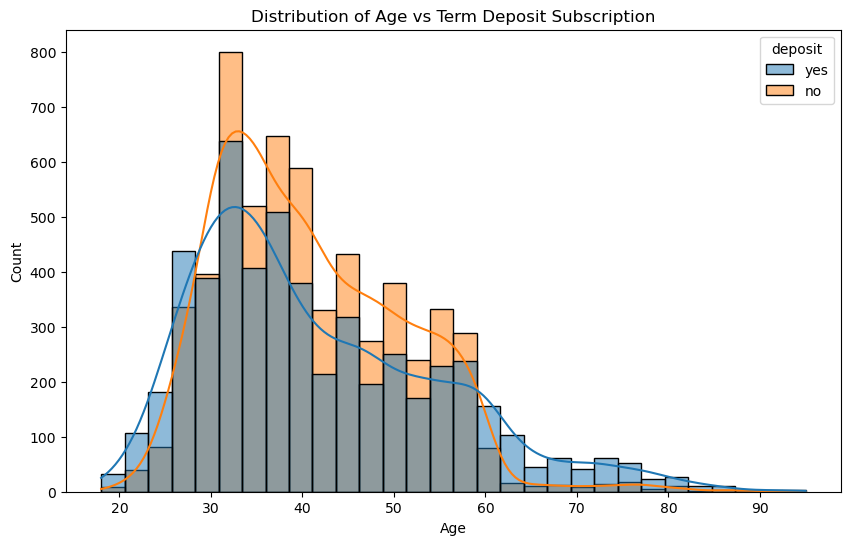

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age vs Term Deposit Subscription
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='deposit', kde=True, bins=30)
plt.title("Distribution of Age vs Term Deposit Subscription")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### 2.2. Distribution of Balance and Term Deposit Subscription

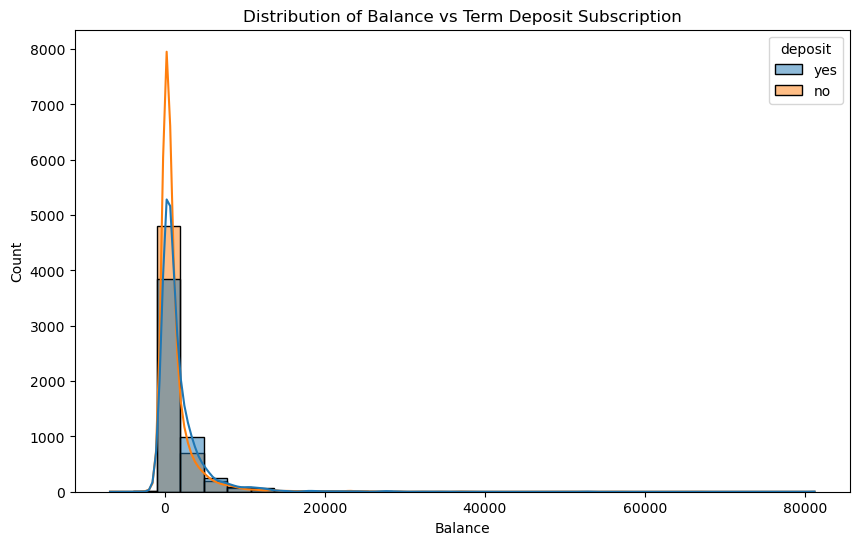

In [7]:

# Distribution of Balance vs Term Deposit Subscription
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='balance', hue='deposit', kde=True, bins=30)
plt.title("Distribution of Balance vs Term Deposit Subscription")
plt.xlabel("Balance")
plt.ylabel("Count")
plt.show()


## 3. Customer Segmentation with KMeans
### 3.1. Clustering Customers by Age, Balance, Duration, Campaign, and Previous

c:\Users\Annuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


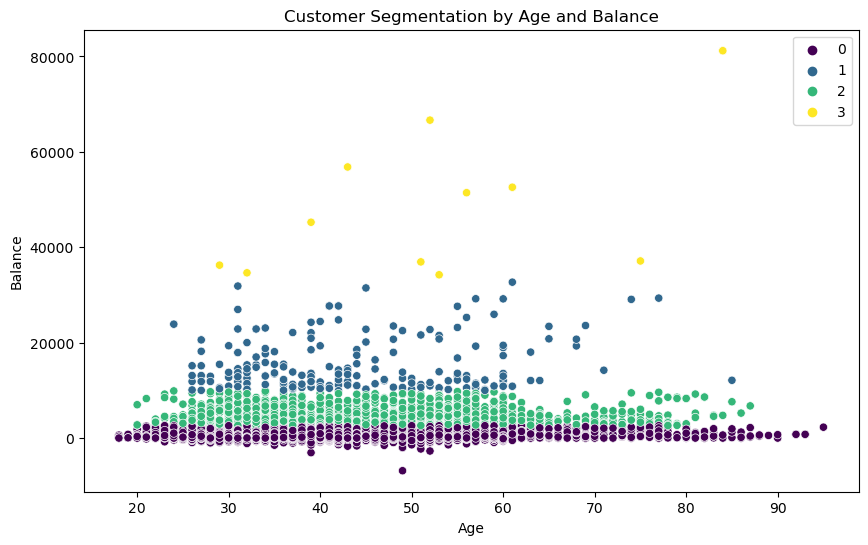

In [8]:

from sklearn.cluster import KMeans

# Select relevant features for clustering and drop any missing values
clustering_data = data[['age', 'balance', 'duration', 'campaign', 'previous']].dropna()

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(clustering_data)

# Add cluster labels to the dataset
data['cluster'] = clusters

# Visualize the clusters by Age and Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustering_data['age'], y=clustering_data['balance'], hue=clusters, palette='viridis')
plt.title('Customer Segmentation by Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


## 4. Predictive Modeling for Term Deposit Subscription
### 4.1. Random Forest Classifier for Predicting Subscription

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1742
           1       0.75      0.77      0.76      1607

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



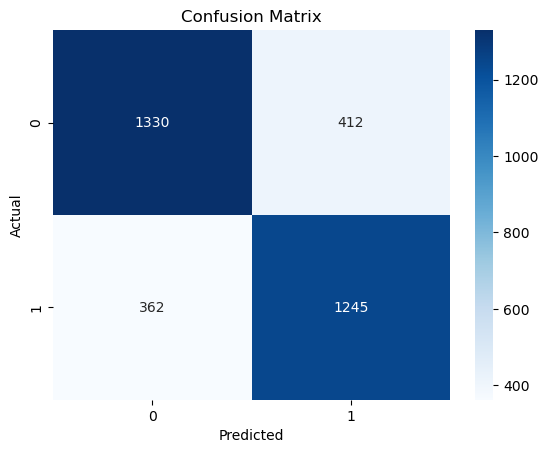

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the data for modeling
X = data[['age', 'balance', 'duration', 'campaign', 'previous']]
y = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Output Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 5. Feature Importance Analysis

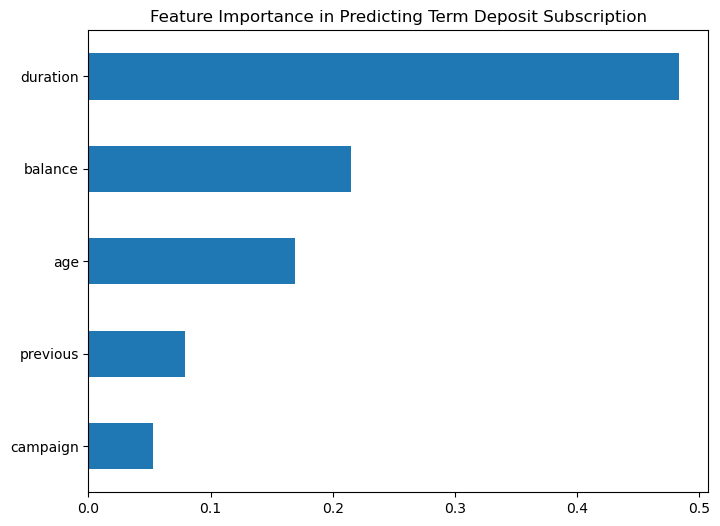

In [10]:

# Feature importance analysis for Random Forest model
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance in Predicting Term Deposit Subscription')
plt.show()


## 6. ROC Curve and AUC Score

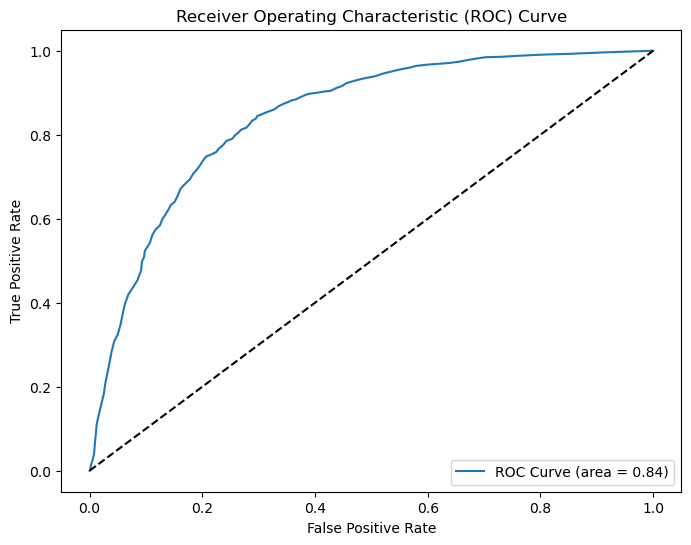

In [11]:

from sklearn.metrics import roc_curve, auc

# ROC curve and AUC score
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
